In [1]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# predict Hougen-Watson reaction using kernel method

## Start here if working on google collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Load data
filename = path+'Data/hougenwatson.dat'
# read text file into pandas DataFrame
datar = pd.read_csv(filename, sep="   ", header=None)
datar.head(5)

<ipython-input-7-1955af9137de>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datar = pd.read_csv(filename, sep="   ", header=None)


,0,1,2,3
0,470.0,300.0,10.0,8.55
1,285.0,80.0,10.0,3.79
2,470.0,300.0,120.0,4.82
3,470.0,80.0,120.0,0.02
4,470.0,80.0,10.0,2.75


In [8]:
X = datar.iloc[:, :3]  # partial pressures
y = datar.iloc[:, 3]   # reaction rate

# Best guess for parameters
beta = np.array([1.0000e+00,
                 5.0000e-02,
                 2.0000e-02,
                 1.0000e-01,
                 2.0000e+00])

# Get the size of X
n, m = X.shape

In [9]:
def ker(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2))

## Gamma = 0.1

In [10]:
# Parameters
gamma = [0.1]

# Load data (assuming data is already loaded as X and y from the previous steps)
# X, y, beta, n, m are already defined in previous code

yhat = np.zeros((n, len(gamma)))
SS = np.zeros(len(gamma))

# Construct kernel matrix and predict output
for k in range(len(gamma)):
    K = np.zeros((n, n))

    for j in range(n):
        for i in range(n):
            K[i, j] = ker(X.iloc[i, :], X.iloc[j, :], gamma[k])

    lam = 0.01
    yhat[:, k] = K @ np.linalg.inv(K + lam * np.eye(n)) @ y

    SS[k] = np.linalg.norm(y - yhat[:, k])

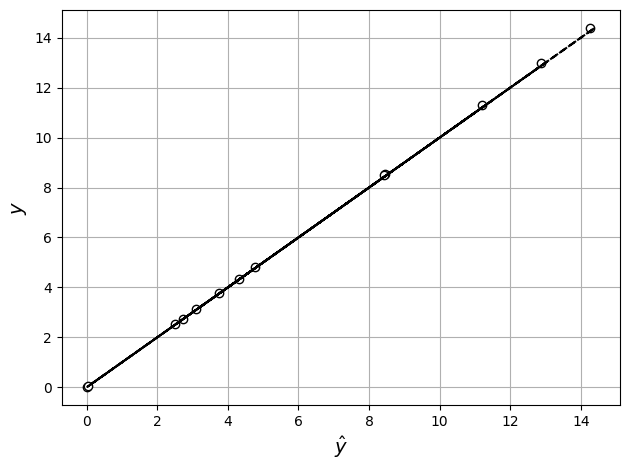

In [11]:
# Plot prediction and data
plt.plot(yhat[:, 0], y, 'o', color='black', markerfacecolor='w')
plt.plot(y, y, 'k--')
plt.xlabel(r'$\hat{y}$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gamma = 0.001

In [12]:
# Parameters
gamma = [0.001]

# Load data (assuming data is already loaded as X and y from the previous steps)
# X, y, beta, n, m are already defined in previous code

yhat = np.zeros((n, len(gamma)))
SS = np.zeros(len(gamma))

# Construct kernel matrix and predict output
for k in range(len(gamma)):
    K = np.zeros((n, n))

    for j in range(n):
        for i in range(n):
            K[i, j] = ker(X.iloc[i, :], X.iloc[j, :], gamma[k])

    lam = 0.01
    yhat[:, k] = K @ np.linalg.inv(K + lam * np.eye(n)) @ y

    SS[k] = np.linalg.norm(y - yhat[:, k])

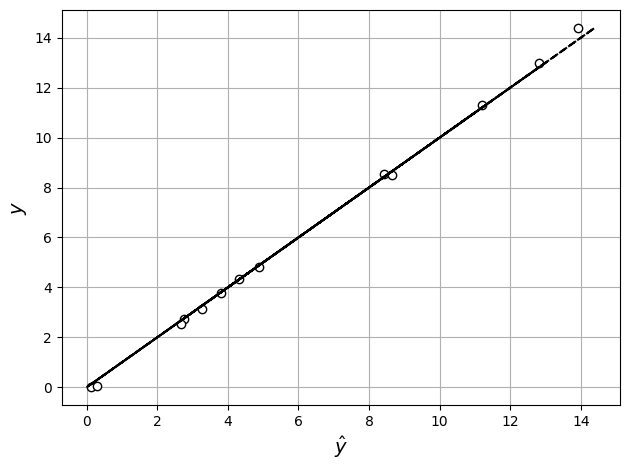

In [13]:
# Plot prediction and data
plt.plot(yhat[:, 0], y, 'o', color='black', markerfacecolor='w')
plt.plot(y, y, 'k--')
plt.xlabel(r'$\hat{y}$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gamma = 0.0001

In [14]:
# Parameters
gamma = [0.001]

# Load data (assuming data is already loaded as X and y from the previous steps)
# X, y, beta, n, m are already defined in previous code

yhat = np.zeros((n, len(gamma)))
SS = np.zeros(len(gamma))

# Construct kernel matrix and predict output
for k in range(len(gamma)):
    K = np.zeros((n, n))

    for j in range(n):
        for i in range(n):
            K[i, j] = ker(X.iloc[i, :], X.iloc[j, :], gamma[k])

    lam = 0.01
    yhat[:, k] = K @ np.linalg.inv(K + lam * np.eye(n)) @ y

    SS[k] = np.linalg.norm(y - yhat[:, k])

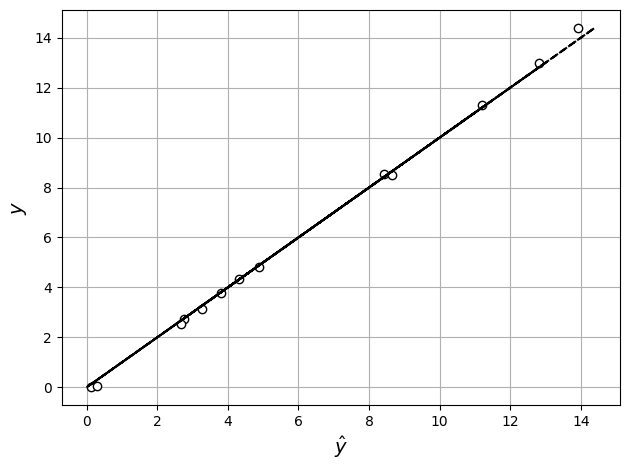

In [15]:
# Plot prediction and data
plt.plot(yhat[:, 0], y, 'o', color='black', markerfacecolor='w')
plt.plot(y, y, 'k--')
plt.xlabel(r'$\hat{y}$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()